In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys, inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 
from settings import PROJECT_PATH, FOR_THESIS_DIR
import comet_ml
import json

In [2]:
print(PROJECT_PATH)

/home/lukaszsus/Developer/X_semestr/magisterka/GazeEstimation/


In [3]:
experiments_file_path = os.path.join(PROJECT_PATH, "experiments_files", "experiments.pickle")
with open(experiments_file_path, 'rb') as file:
    df_results = pickle.load(file)

In [4]:
df_results.columns

Index(['id', 'name', 'Adam_amsgrad', 'Adam_beta_1', 'Adam_beta_2',
       'Adam_decay', 'Adam_epsilon', 'Adam_learning_rate', 'Optimizer',
       'conv_sizes', 'curr_epoch', 'curr_step',
       'data_set_eye_combination_type', 'data_set_eye_im_size',
       'data_set_grayscale', 'data_set_headpose_size', 'data_set_input',
       'data_set_load_function', 'data_set_output', 'data_set_output_size',
       'data_set_path', 'dense_layers', 'dense_sizes', 'dropout', 'epochs',
       'learning_rate', 'loss_name', 'model_cls', 'optimizer_name',
       'person_id', 'sys.gpu.0.free_memory', 'sys.gpu.0.gpu_utilization',
       'sys.gpu.0.total_memory', 'sys.gpu.0.used_memory', 'test_loss',
       'test_mae_0', 'test_mae_1', 'test_mean_absolute_error',
       'test_mean_squared_error', 'train_loss', 'train_mae_0', 'train_mae_1',
       'train_mean_absolute_error', 'train_mean_squared_error', 'SGD_decay',
       'SGD_learning_rate', 'SGD_momentum', 'SGD_nesterov',
       'angle_error_degrees', 'da

# One eye all people separately

In [5]:
df_hysts_one_eye_all_people_separately = df_results[df_results["name"] == "hysts_one_eye_all_people_separately"]

In [6]:
def one_eye_sep_find_best(df):
    df_0_best = df[df["person_id"] == '0']
    df_0_best["angle_error_degrees"] = df_0_best["angle_error_degrees"].astype(float)
    best = df_0_best[df_0_best["angle_error_degrees"] == df_0_best["angle_error_degrees"].min()]
    best = best.T
    best = best.dropna()
    return best

In [7]:
one_eye_sep_find_best(df_hysts_one_eye_all_people_separately)

/home/lukaszsus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,625
id,962448d750844c33a32890118dd1e4ab
name,hysts_one_eye_all_people_separately
Adam_amsgrad,false
Adam_beta_1,0.9
Adam_beta_2,0.999
Adam_decay,0.0
Adam_epsilon,1.0E-7
Adam_learning_rate,0.001
Optimizer,Adam
conv_sizes,"[{""n_filters"":16,""filter_size"":[3,3],""padding""..."


In [8]:
def bar_plot_per_person(df, file_name='one_eye_separately.png'):
    df = df[["person_id", "test_mean_absolute_error", "angle_error_degrees"]]
    df = df.dropna()
    df = df.astype({"person_id": int, "test_mean_absolute_error": float, "angle_error_degrees": float})
    df = df.groupby(["person_id"]).min()
    df = df.reset_index()
    
    df = df[["person_id", "angle_error_degrees"]]
    df = df.rename({"person_id": "Id osoby", "angle_error_degrees": "Błąd w stopniach"},
                                                        axis=1)
    mean = np.mean(df["Błąd w stopniach"].values)
    df = df.append([{"Id osoby": "średnia", "Błąd w stopniach": mean}], ignore_index=True)
    df = df.round({"Błąd w stopniach": 2})
    
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x="Id osoby", y="Błąd w stopniach", data=df.iloc[:-1, :])
    ax.set_xlabel("Id osoby", fontsize=30)
    ax.set_ylabel("Błąd w stopniach", fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(os.path.join(FOR_THESIS_DIR, file_name))
    
    return df

,Id osoby,Błąd w stopniach
0,0,1.84
1,1,2.21
2,2,2.14
3,3,3.50
4,4,2.19
5,5,3.04
6,6,2.91
7,7,4.17
8,8,4.73
9,9,2.77


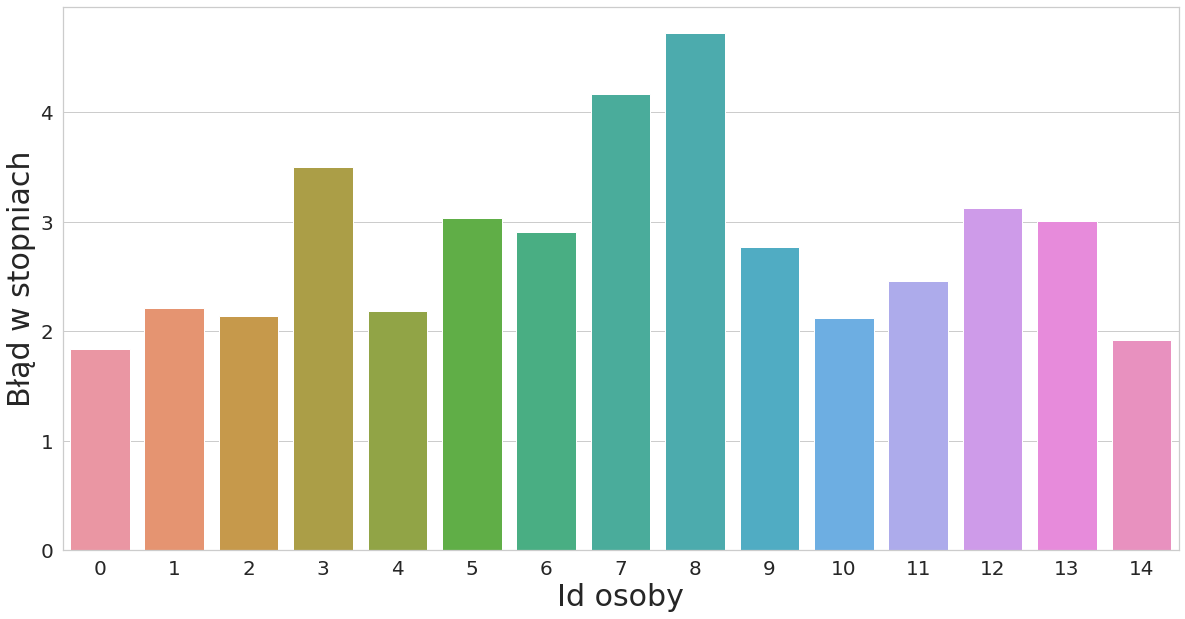

In [9]:
df_one_eye_separately = bar_plot_per_person(df_hysts_one_eye_all_people_separately)
df_one_eye_separately

In [10]:
latex = df_one_eye_separately.to_latex(index=False).replace(".", ",").replace("True", "tak").replace("False", "nie")
with open(os.path.join(FOR_THESIS_DIR, "results_one_eye_separately.txt"), 'w') as file:
    file.write(latex)

# Both from single

In [11]:
df_mpiigaze_both_from_single = df_results[df_results["name"] == "mpiigaze_both_from_single"]

In [12]:
def bar_plot_per_person_from_metric(df):
    df = df.astype({"test_angle_error_degrees": float})
    best_model_row = df[df["test_angle_error_degrees"] == df["test_angle_error_degrees"].dropna().min()]
    metric_name_template = "test_angle_error_degrees_{}"
    
    people_ids = list(range(15))
    values = list()
    for person_id in people_ids:
        values.append(float(best_model_row[metric_name_template.format(person_id)]))
    
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=people_ids, y=values)
    ax.set_xlabel("Id osoby", fontsize=30)
    ax.set_ylabel("Błąd w stopniach", fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    
    plt.savefig(os.path.join(FOR_THESIS_DIR, 'both_eyes_error_per_person.png'))
    
    df_error_per_person = pd.DataFrame({"Id osoby": people_ids, "Błąd w stopniach": values})
    return df_error_per_person

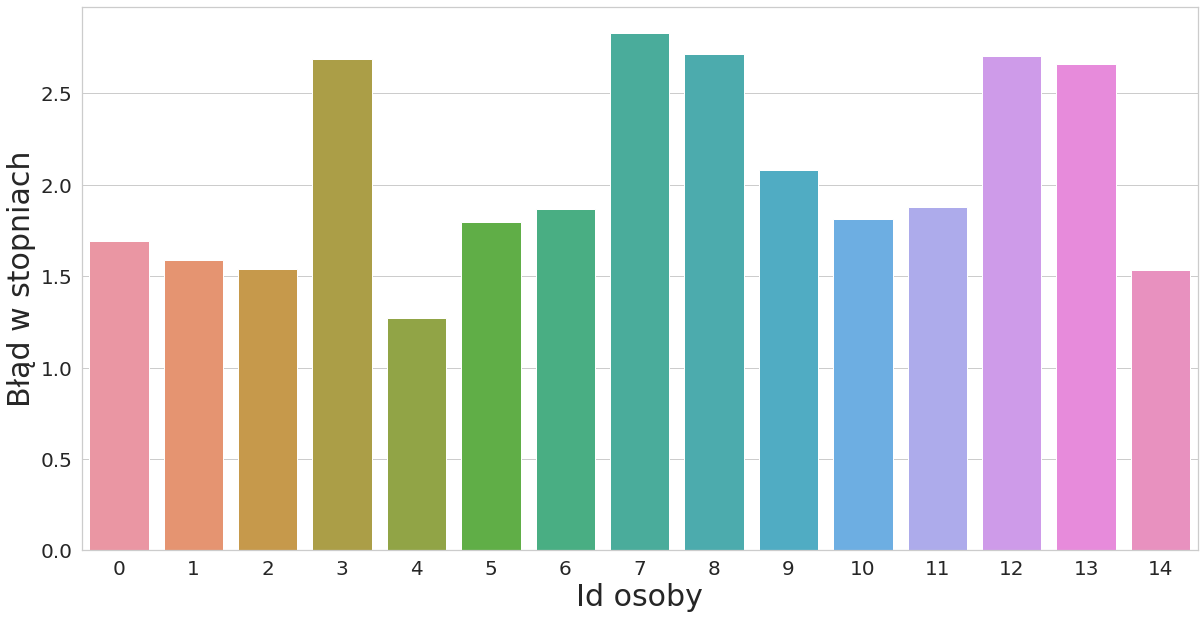

In [13]:
df_best_model_error_per_person = bar_plot_per_person_from_metric(df_mpiigaze_both_from_single)

In [14]:
mean = np.mean(df_best_model_error_per_person["Błąd w stopniach"].values)
df_best_model_error_per_person = df_best_model_error_per_person.append(
    [{"Id osoby": "średnia", "Błąd w stopniach": mean}], ignore_index=True)
df_best_model_error_per_person = df_best_model_error_per_person.round({"Błąd w stopniach": 2})
df_best_model_error_per_person

,Id osoby,Błąd w stopniach
0,0,1.69
1,1,1.59
2,2,1.54
3,3,2.69
4,4,1.27
5,5,1.80
6,6,1.87
7,7,2.83
8,8,2.71
9,9,2.08


In [15]:
latex = df_best_model_error_per_person.to_latex(index=False).replace(".", ",").replace("True", "tak").replace("False", "nie")
with open(os.path.join(FOR_THESIS_DIR, "results_both_eyes.txt"), 'w') as file:
    file.write(latex)

# Both eyes - angle error

In [16]:
df_both_angle = df_results[df_results["name"] == "mpiigaze_both_from_single"]
df_both_angle.columns

Index(['id', 'name', 'Adam_amsgrad', 'Adam_beta_1', 'Adam_beta_2',
       'Adam_decay', 'Adam_epsilon', 'Adam_learning_rate', 'Optimizer',
       'conv_sizes', 'curr_epoch', 'curr_step',
       'data_set_eye_combination_type', 'data_set_eye_im_size',
       'data_set_grayscale', 'data_set_headpose_size', 'data_set_input',
       'data_set_load_function', 'data_set_output', 'data_set_output_size',
       'data_set_path', 'dense_layers', 'dense_sizes', 'dropout', 'epochs',
       'learning_rate', 'loss_name', 'model_cls', 'optimizer_name',
       'person_id', 'sys.gpu.0.free_memory', 'sys.gpu.0.gpu_utilization',
       'sys.gpu.0.total_memory', 'sys.gpu.0.used_memory', 'test_loss',
       'test_mae_0', 'test_mae_1', 'test_mean_absolute_error',
       'test_mean_squared_error', 'train_loss', 'train_mae_0', 'train_mae_1',
       'train_mean_absolute_error', 'train_mean_squared_error', 'SGD_decay',
       'SGD_learning_rate', 'SGD_momentum', 'SGD_nesterov',
       'angle_error_degrees', 'da

In [17]:
def both_eyes_comparison_to_thesis(df):
    df = df[["model_cls", "data_set_grayscale", "test_angle_error_degrees", "forward_pass_time_cpu"]].dropna()
    df = df.astype({"test_angle_error_degrees": float,
                 "forward_pass_time_cpu": float})
    
    model_names = df["model_cls"].unique()
    grayscales = df["data_set_grayscale"].unique()
    
    table = list()
    
    for model_name in model_names:
        for grayscale in grayscales:
            df_tmp = df[df["model_cls"] == model_name]
            df_tmp = df_tmp[df_tmp["data_set_grayscale"] == grayscale]
            error_min = df_tmp["test_angle_error_degrees"].min()
            arg_min = df_tmp["test_angle_error_degrees"].argmin()
            time = np.mean(df_tmp[df_tmp.index == arg_min]["forward_pass_time_cpu"].values)
            table.append({"Stos": model_name,
                         "Model barw": grayscale,
                         "Błąd (stopnie)": error_min,
                         "Czas [s]": time})
    
    table = pd.DataFrame(table)
    table = table.round({"Błąd (stopnie)": 2, "Czas [s]": 4})
    return table

### Save table to latex

In [18]:
df_both_eyes_to_latex = both_eyes_comparison_to_thesis(df_both_angle)
latex = df_both_eyes_to_latex.to_latex(index=False).replace(
    ".", ",").replace(
    "true", "skala szarości").replace("false", "RGB").replace(
    "Modal3ConvNetStacked", "tak").replace("Modal3ConvNet", "nie")
with open(os.path.join(FOR_THESIS_DIR, "results_both_eyes_grayscale_stacked.txt"), 'w') as file:
    file.write(latex)

/home/lukaszsus/.local/lib/python3.6/site-packages/ipykernel_launcher.py:16: FutureWarning: 
The current behaviour of 'Series.argmin' is deprecated, use 'idxmin'
instead.
The behavior of 'argmin' will be corrected to return the positional
minimum in the future. For now, use 'series.values.argmin' or
'np.argmin(np.array(values))' to get the position of the minimum
row.
  app.launch_new_instance()


## Czas przetwarzania

In [19]:
df_time = df_results[df_results["name"] == "mpiigaze_both_landmarks_coords"]
df_time["model_cls"]

3041    Modal3ConvNet
3042    Modal3ConvNet
3043    Modal3ConvNet
3044    Modal3ConvNet
3045    Modal3ConvNet
3046    Modal3ConvNet
3047    Modal3ConvNet
3048    Modal3ConvNet
3049    Modal3ConvNet
3050    Modal3ConvNet
3051    Modal3ConvNet
3052    Modal3ConvNet
3053    Modal3ConvNet
3054    Modal3ConvNet
3055    Modal3ConvNet
3056    Modal3ConvNet
3057    Modal3ConvNet
3058    Modal3ConvNet
3059    Modal3ConvNet
Name: model_cls, dtype: object

In [20]:
df_time = df_time.dropna(subset=["forward_pass_time_gpu"])
df_time = df_time.astype({"forward_pass_time_gpu": float, "train_mean_absolute_error": float})
df_time = df_time[["model_cls", "conv_sizes", "dense_sizes", "forward_pass_time_gpu", "train_mean_absolute_error"]].groupby(["model_cls", "conv_sizes", "dense_sizes"]).mean()
df_time = df_time.reset_index()

In [21]:
df_time

,model_cls,conv_sizes,dense_sizes,forward_pass_time_gpu,train_mean_absolute_error
0,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[256,64,2]",0.005541,0.068696
1,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[3,3],""padding""...","[512,128,2]",0.005950,0.060524
2,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[5,5],""padding""...","[256,64,2]",0.006549,0.092066
3,Modal3ConvNet,"[{""n_filters"":16,""filter_size"":[5,5],""padding""...","[512,128,2]",0.005915,0.061498


# Load new experiments data

In [22]:
experiments_file_path = os.path.join(PROJECT_PATH, "experiments_files", "experiments-2020-05-24-t13-08.pickle")
with open(experiments_file_path, 'rb') as file:
    df_results = pickle.load(file)

# Leave one out - one eye

In [23]:
mpiigaze_one_eye_leave_one_out = df_results[df_results["name"] == "mpiigaze_one_eye_leave_one_out"]
mpiigaze_one_eye_leave_one_out = mpiigaze_one_eye_leave_one_out.astype(
    {"person_id": int, "test_angle_error_degrees": float})

In [24]:
columns = ["person_id", "test_angle_error_degrees", "dense_sizes", "dropout"]
mpiigaze_one_eye_leave_one_out = mpiigaze_one_eye_leave_one_out[columns]
one_eye_leave_one_out_best_per_person = mpiigaze_one_eye_leave_one_out.sort_values(
    "test_angle_error_degrees", ascending=True).groupby("person_id", as_index=False).first()
one_eye_leave_one_out_best_model = mpiigaze_one_eye_leave_one_out[
    (mpiigaze_one_eye_leave_one_out["dense_sizes"] == "[512,128,2]") 
    & (mpiigaze_one_eye_leave_one_out["dropout"] == "0.1")]

### Mean error form every model

In [25]:
mpiigaze_one_eye_leave_one_out = one_eye_leave_one_out_best_per_person.rename(
    {"person_id": "Id osoby", "test_angle_error_degrees": "Błąd w stopniach (min.)",
    "dense_sizes": "Warstwy w pełni połączone", "dropout": "Dropout"}, axis=1)
one_eye_leave_one_out_best_model["Błąd w stopniach (najlepszy model)"] = one_eye_leave_one_out_best_model[
    "test_angle_error_degrees"].astype(float)
mpiigaze_one_eye_leave_one_out = mpiigaze_one_eye_leave_one_out.merge(
    one_eye_leave_one_out_best_model[["person_id", "Błąd w stopniach (najlepszy model)"]], 
    left_on="Id osoby", right_on="person_id")
mpiigaze_one_eye_leave_one_out = mpiigaze_one_eye_leave_one_out[["Id osoby", "Błąd w stopniach (min.)",
                                                                 "Błąd w stopniach (najlepszy model)",
                                                                "Warstwy w pełni połączone", "Dropout"]]

In [26]:
mean_df = mpiigaze_one_eye_leave_one_out.groupby(["Warstwy w pełni połączone", "Dropout"], as_index=False).mean()
mean_df = mean_df.sort_values("Błąd w stopniach (min.)")
mean_df = mean_df[mpiigaze_one_eye_leave_one_out.columns]
mean_df["Id osoby"] = ["średnia"] * len(mean_df)

In [27]:
mpiigaze_one_eye_leave_one_out = mpiigaze_one_eye_leave_one_out.append(mean_df, ignore_index=True)

In [28]:
mpiigaze_one_eye_leave_one_out = mpiigaze_one_eye_leave_one_out.round({"Błąd w stopniach (min.)": 2,
                                                                      "Błąd w stopniach (najlepszy model)": 2})
mpiigaze_one_eye_leave_one_out

,Id osoby,Błąd w stopniach (min.),Błąd w stopniach (najlepszy model),Warstwy w pełni połączone,Dropout
0,0,4.47,4.68,"[256,64,2]",0.2
1,1,5.04,6.76,"[256,64,2]",0.1
2,2,5.29,5.79,"[256,64,2]",0.2
3,3,5.25,5.25,"[512,128,2]",0.1
4,4,6.13,6.19,"[256,64,2]",0.2
5,5,6.81,7.45,"[512,128,2]",0.2
6,6,5.77,6.41,"[256,64,2]",0.1
7,7,4.85,5.16,"[512,128,2]",0.2
8,8,6.35,6.47,"[256,64,2]",0.2
9,9,8.30,8.75,"[512,128,2]",0.2


In [29]:
latex = mpiigaze_one_eye_leave_one_out.to_latex(index=False).replace(".", ",")
with open(os.path.join(FOR_THESIS_DIR, "results_one_eye_leave_one_out.txt"), 'w') as file:
    file.write(latex)

In [116]:
def bar_plot_leave_one_out(df, x_col, y_col, file_name='one_eye_leave_one_out.png',
                          y_label="Błąd w stopniach"):  
    plt.figure(figsize=(20, 10))
    sns.set(style="whitegrid")
    ax = sns.barplot(x=x_col, y=y_col, data=df)
    ax.set_xlabel("Id osoby", fontsize=30)
    ax.set_ylabel(y_label, fontsize=30)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    plt.savefig(os.path.join(FOR_THESIS_DIR, file_name))

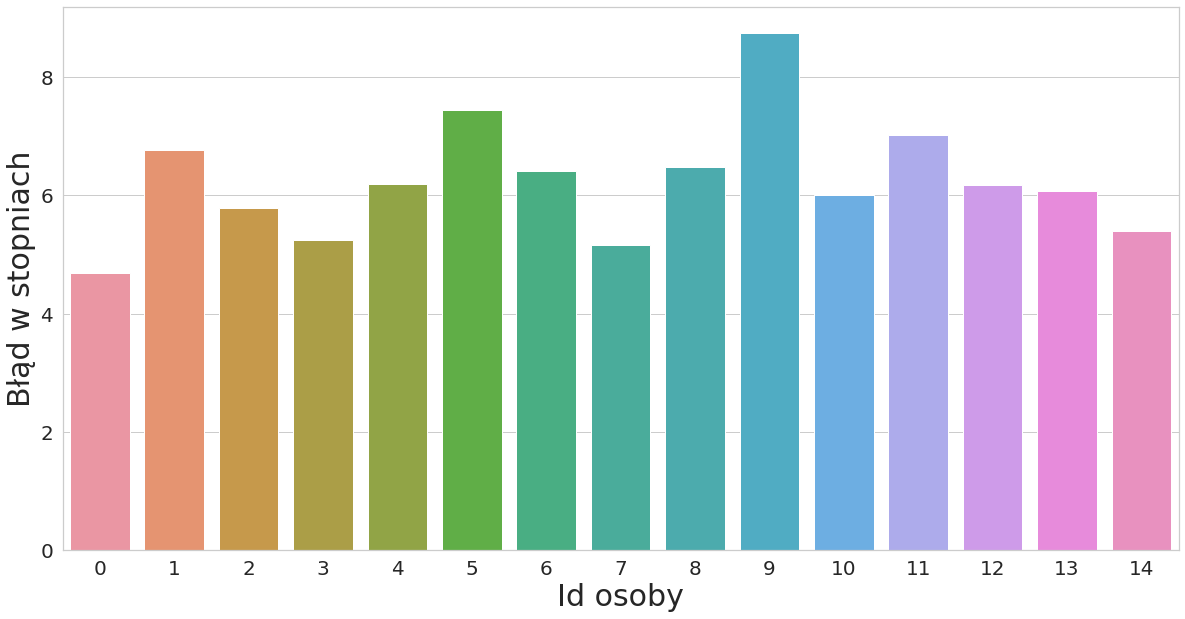

In [31]:
bar_plot_leave_one_out(mpiigaze_one_eye_leave_one_out.iloc[:15, :], x_col="Id osoby", 
                        y_col="Błąd w stopniach (najlepszy model)",
                        file_name='one_eye_leave_one_out.png')

# Leave one out - both eyes

In [119]:
columns = ["person_id", "test_angle_error_degrees", "model_cls", "dropout"]

def get_leave_one_out_both_clean_data(df_results, name="mpiigaze_both_leave_one_out"):
    df_leave_one_out = df_results[df_results["name"] == name]
    df_leave_one_out = df_leave_one_out.astype({"person_id": int, "test_angle_error_degrees": float})
    df_leave_one_out.dropna(subset=["forward_pass_time_cpu"], inplace=True)
    return df_leave_one_out

def get_mean_error_per_model(df_leave_one_out):
    mean_df = df_leave_one_out.groupby(["model_cls", "dropout"], as_index=False).mean()
    mean_df = mean_df.sort_values("test_angle_error_degrees")
    mean_df = mean_df[columns]
    mean_df["person_id"] = ["średnia"] * len(mean_df)
    return mean_df

def get_merged(df_leave_one_out):
    df_leave_one_out_best_per_person = df_leave_one_out.sort_values(
        "test_angle_error_degrees", ascending=True).groupby("person_id", as_index=False).first()
    df_leave_one_out_best_model = df_leave_one_out[
        (df_leave_one_out["model_cls"] == "Modal3ConvNet") 
        & (df_leave_one_out["dropout"] == "0.1")]
    df_leave_one_out_best_model = df_leave_one_out_best_model.rename({
        "test_angle_error_degrees": "test_angle_error_degrees_best_model"
    }, axis=1)
    df_leave_one_out_best_model = df_leave_one_out_best_model.groupby(
        ["person_id"], as_index=False).min()
    df_leave_one_out = df_leave_one_out_best_per_person.merge(
        df_leave_one_out_best_model[["person_id", "test_angle_error_degrees_best_model"]], 
        left_on="person_id", right_on="person_id")
    df_leave_one_out = df_leave_one_out[["person_id", "test_angle_error_degrees",
                                        "test_angle_error_degrees_best_model",
                                         "model_cls", "dropout"]]
    return df_leave_one_out

def add_mean(df_leave_one_out, df_mean):
    df_leave_one_out = df_leave_one_out.append(df_mean, ignore_index=True)
    df_leave_one_out = df_leave_one_out[["person_id", "test_angle_error_degrees", "test_angle_error_degrees_best_model", "model_cls", "dropout"]]
    return df_leave_one_out

In [33]:
df_leave_one_out = get_leave_one_out_both_clean_data(df_results)
df_mean = get_mean_error_per_model(df_leave_one_out)
df_leave_one_out = df_leave_one_out[columns]
df_leave_one_out = get_merged(df_leave_one_out)
df_leave_one_out = add_mean(df_leave_one_out, df_mean)
df_leave_one_out = df_leave_one_out.round({"test_angle_error_degrees": 2,
                                         "test_angle_error_degrees_best_model": 2})

/home/lukaszsus/.local/lib/python3.6/site-packages/pandas/core/frame.py:7138: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [34]:
df_leave_one_out

,person_id,test_angle_error_degrees,test_angle_error_degrees_best_model,model_cls,dropout
0,0,3.92,3.92,Modal3ConvNet,0.1
1,1,3.58,4.13,Modal3ConvNetStacked,0.2
2,2,5.50,5.58,Modal3ConvNet,0.2
3,3,4.63,4.91,Modal3ConvNet,0.2
4,4,4.05,4.05,Modal3ConvNet,0.1
5,5,6.01,6.47,Modal3ConvNetStacked,0.2
6,6,4.43,4.43,Modal3ConvNet,0.1
7,7,4.82,4.82,Modal3ConvNet,0.1
8,8,6.24,6.48,Modal3ConvNetStacked,0.2
9,9,6.42,6.94,Modal3ConvNetStacked,0.2


In [35]:
df_leave_one_out = df_leave_one_out.rename(
    {"person_id": "Id osoby", "test_angle_error_degrees": "Błąd w stopniach (min.)",
     "test_angle_error_degrees_best_model": "Błąd w stopniach (najlepszy model)",
    "model_cls": "Rodzaj sieci", "dropout": "Dropout"}, axis=1)

In [36]:
df_leave_one_out

,Id osoby,Błąd w stopniach (min.),Błąd w stopniach (najlepszy model),Rodzaj sieci,Dropout
0,0,3.92,3.92,Modal3ConvNet,0.1
1,1,3.58,4.13,Modal3ConvNetStacked,0.2
2,2,5.50,5.58,Modal3ConvNet,0.2
3,3,4.63,4.91,Modal3ConvNet,0.2
4,4,4.05,4.05,Modal3ConvNet,0.1
5,5,6.01,6.47,Modal3ConvNetStacked,0.2
6,6,4.43,4.43,Modal3ConvNet,0.1
7,7,4.82,4.82,Modal3ConvNet,0.1
8,8,6.24,6.48,Modal3ConvNetStacked,0.2
9,9,6.42,6.94,Modal3ConvNetStacked,0.2


In [37]:
latex = df_leave_one_out.to_latex(index=False).replace(".", ",").replace("NaN", "-")
with open(os.path.join(FOR_THESIS_DIR, "results_both_eyes_leave_one_out.txt"), 'w') as file:
    file.write(latex)

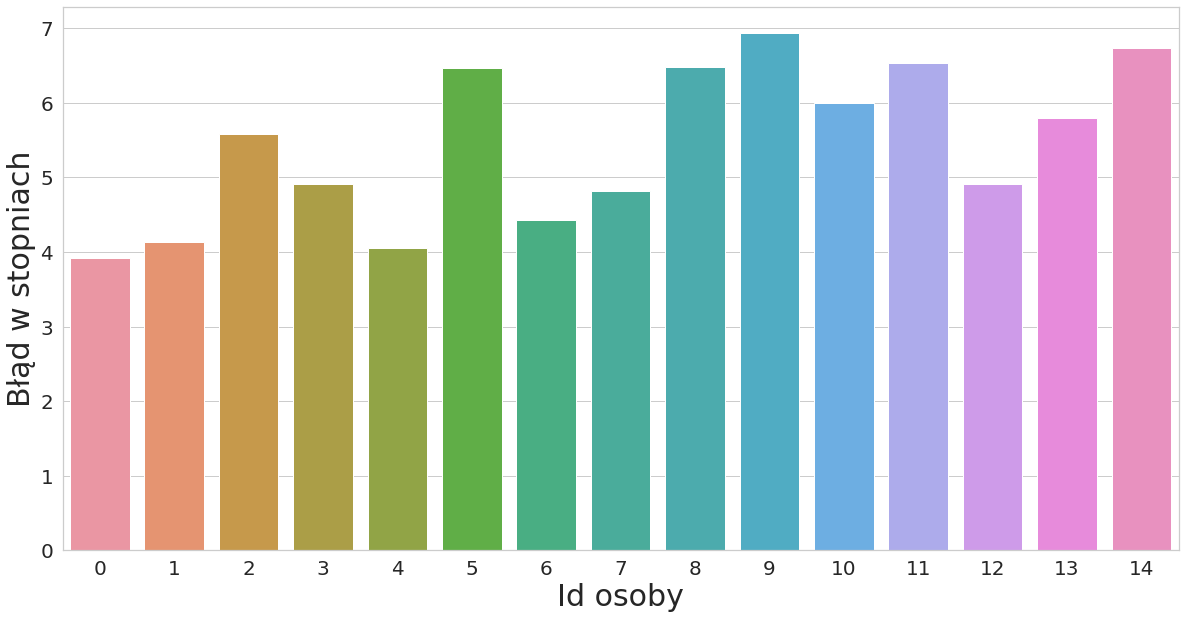

In [38]:
bar_plot_leave_one_out(df_leave_one_out.iloc[:15, :], x_col="Id osoby", 
                        y_col="Błąd w stopniach (najlepszy model)",
                        file_name='both_eyes_leave_one_out.png')

# Leave one out - coordinates

In [142]:
columns = ["person_id", "test_mean_absolute_error", "data_set_grayscale"]

def get_leave_one_out_both_clean_data(df_results, name="mpiigaze_both_landmarks_coords_leave_one_out"):
    df_leave_one_out = df_results[df_results["name"] == name]
    df_leave_one_out = df_leave_one_out.astype({"person_id": int, "test_mean_absolute_error": float})
    df_leave_one_out.dropna(subset=["forward_pass_time_gpu"], inplace=True)
    return df_leave_one_out

def get_mean_error_per_model(df_leave_one_out):
    mean_df = df_leave_one_out.groupby(["data_set_grayscale"], as_index=False).mean()
    mean_df = mean_df.sort_values("test_mean_absolute_error")
    mean_df = mean_df[columns]
    mean_df["person_id"] = ["średnia"] * len(mean_df)
    return mean_df

def get_merged(df_leave_one_out, grayscale="false"):
    df_leave_one_out_best_per_person = df_leave_one_out.sort_values(
        "test_mean_absolute_error", ascending=True).groupby("person_id", as_index=False).first()
    df_leave_one_out_best_model = df_leave_one_out[df_leave_one_out["data_set_grayscale"] == grayscale]
    df_leave_one_out_best_model = df_leave_one_out_best_model.rename({
        "test_mean_absolute_error": "test_mean_absolute_error_best_model"
    }, axis=1)
    df_leave_one_out_best_model = df_leave_one_out_best_model.groupby(
        ["person_id"], as_index=False).min()
    df_leave_one_out = df_leave_one_out_best_per_person.merge(
        df_leave_one_out_best_model[["person_id", "test_mean_absolute_error_best_model"]], 
        left_on="person_id", right_on="person_id")
    df_leave_one_out = df_leave_one_out[["person_id", "test_mean_absolute_error",
                                        "test_mean_absolute_error_best_model",
                                         "data_set_grayscale"]]
    return df_leave_one_out

def add_mean(df_leave_one_out, df_mean):
    df_leave_one_out = df_leave_one_out.append(df_mean, ignore_index=True)
    df_leave_one_out = df_leave_one_out[["person_id", "test_mean_absolute_error", "test_mean_absolute_error_best_model", "data_set_grayscale"]]
    return df_leave_one_out

In [127]:
df_leave_one_out = get_leave_one_out_both_clean_data(df_results)
df_mean = get_mean_error_per_model(df_leave_one_out)
df_leave_one_out = df_leave_one_out[columns]
df_leave_one_out = get_merged(df_leave_one_out)
df_leave_one_out = add_mean(df_leave_one_out, df_mean)
df_leave_one_out = df_leave_one_out.round({"test_mean_absolute_error": 4,
                                         "test_mean_absolute_error_best_model": 4})
df_leave_one_out = df_leave_one_out.rename(
    {"person_id": "Id osoby", "test_mean_absolute_error": "MAE (min.)",
     "test_mean_absolute_error_best_model": "MAE (najlepszy model)",
    "data_set_grayscale": "Skala szarości"}, axis=1)

In [128]:
df_leave_one_out

,Id osoby,MAE (min.),MAE (najlepszy model),Skala szarości
0,0,0.0885,0.0953,true
1,1,0.0999,0.0999,false
2,2,0.1103,0.1207,true
3,3,0.1294,0.1471,true
4,4,0.1125,0.1223,true
5,5,0.1279,0.1304,true
6,6,0.1049,0.1049,false
7,7,0.1314,0.1314,false
8,8,0.1544,0.1544,false
9,9,0.1608,0.1827,true


In [129]:
df_leave_one_out.iloc[15, 2] = df_leave_one_out.iloc[15, 1]
df_leave_one_out.iloc[16, 2] = df_leave_one_out.iloc[16, 1]
df_leave_one_out.iloc[15, 0] = "skala szarości (średnia)"
df_leave_one_out.iloc[16, 0] = "RGB (średnia)"

In [130]:
df_leave_one_out = df_leave_one_out[["Id osoby", "MAE (najlepszy model)"]]

In [131]:
df_leave_one_out

,Id osoby,MAE (najlepszy model)
0,0,0.0953
1,1,0.0999
2,2,0.1207
3,3,0.1471
4,4,0.1223
5,5,0.1304
6,6,0.1049
7,7,0.1314
8,8,0.1544
9,9,0.1827


In [132]:
latex = df_leave_one_out.to_latex(index=False).replace(".", ",")
with open(os.path.join(FOR_THESIS_DIR, "results_both_eyes_coords_leave_one_out.txt"), 'w') as file:
    file.write(latex)

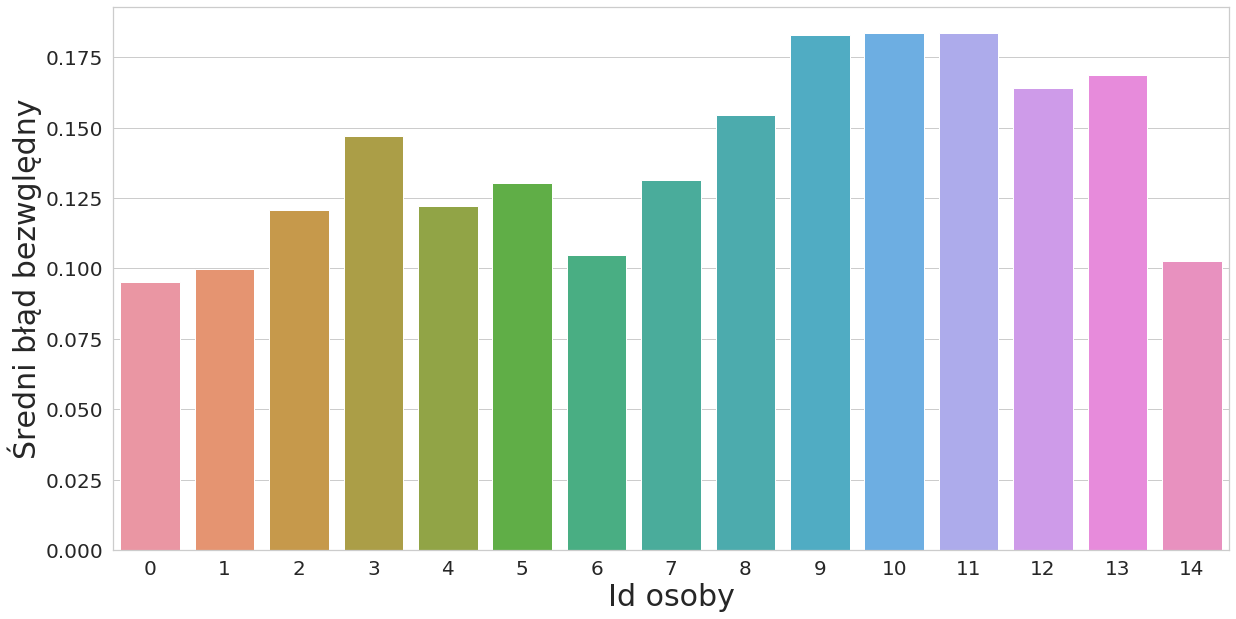

In [133]:
bar_plot_leave_one_out(df_leave_one_out.iloc[:15, :], x_col="Id osoby", 
                        y_col="MAE (najlepszy model)",
                        file_name='both_eyes_coords_leave_one_out.png',
                      y_label="Średni błąd bezwględny")

# Leave one out - coordinates - reject suspicious

In [143]:
df_leave_one_out = get_leave_one_out_both_clean_data(df_results, name="mpiigaze_both_landmarks_coords_leave_one_out_reject_suspicious")
df_mean = get_mean_error_per_model(df_leave_one_out)
df_leave_one_out = df_leave_one_out[columns]
df_leave_one_out = get_merged(df_leave_one_out, grayscale="true")
df_leave_one_out = add_mean(df_leave_one_out, df_mean)
df_leave_one_out = df_leave_one_out.round({"test_mean_absolute_error": 4,
                                         "test_mean_absolute_error_best_model": 4})
df_leave_one_out = df_leave_one_out.rename(
    {"person_id": "Id osoby", "test_mean_absolute_error": "MAE (min.)",
     "test_mean_absolute_error_best_model": "MAE (najlepszy model)",
    "data_set_grayscale": "Skala szarości"}, axis=1)

In [144]:
df_leave_one_out

,Id osoby,MAE (min.),MAE (najlepszy model),Skala szarości
0,0,0.0895,0.0961,false
1,1,0.1364,0.1414,false
2,2,0.1087,0.1087,true
3,3,0.1311,0.1390,false
4,4,0.1045,0.1045,true
5,5,0.1250,0.1292,false
6,6,0.1089,0.1089,true
7,8,0.1536,0.1536,true
8,9,0.2195,0.2195,true
9,10,0.1969,0.2214,false


In [145]:
df_leave_one_out.iloc[14, 2] = df_leave_one_out.iloc[14, 1]
df_leave_one_out.iloc[15, 2] = df_leave_one_out.iloc[15, 1]
df_leave_one_out.iloc[14, 0] = "RGB (średnia)"
df_leave_one_out.iloc[15, 0] = "skala szarości (średnia)"

In [146]:
df_leave_one_out = df_leave_one_out[["Id osoby", "MAE (najlepszy model)"]]

In [147]:
df_leave_one_out

,Id osoby,MAE (najlepszy model)
0,0,0.0961
1,1,0.1414
2,2,0.1087
3,3,0.1390
4,4,0.1045
5,5,0.1292
6,6,0.1089
7,8,0.1536
8,9,0.2195
9,10,0.2214


In [148]:
latex = df_leave_one_out.to_latex(index=False).replace(".", ",")
with open(os.path.join(FOR_THESIS_DIR, "results_both_eyes_coords_leave_one_out_reject_suspicious.txt"), 'w') as file:
    file.write(latex)

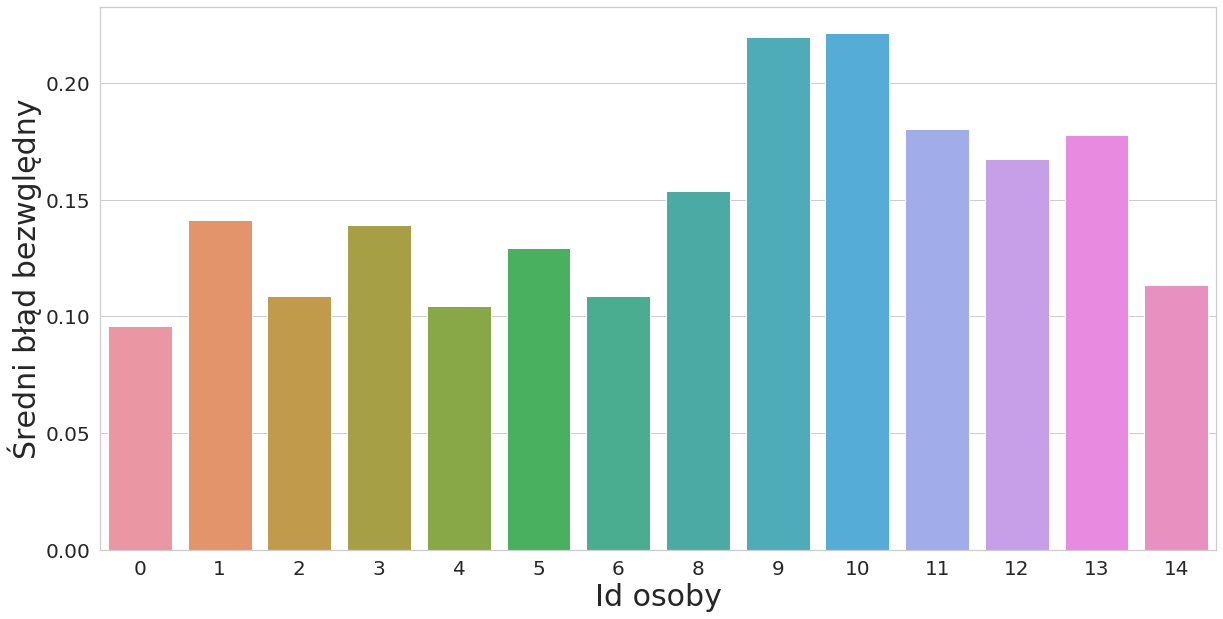

In [150]:
bar_plot_leave_one_out(df_leave_one_out.iloc[:14, :], x_col="Id osoby", 
                        y_col="MAE (najlepszy model)",
                        file_name='both_eyes_coords_leave_one_out_reject_suspicious.png',
                      y_label="Średni błąd bezwględny")